In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [2]:
dataset = pd.read_csv("log2.csv")

In [3]:
feature_cols = ['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received']

In [4]:
action_values = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}
dataset.Action = [action_values[item] for item in dataset.Action]

In [5]:
data = dataset[feature_cols]
target = dataset.Action 

In [6]:
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,1,177,94,83,2,30,1,1
1,56258,3389,56258,3389,1,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,1,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,1,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,1,25358,6778,18580,31,16,13,18


In [7]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=1)

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [9]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [10]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy(in %): 69.401208569859


In [11]:
print("F1 score(in %):", metrics.f1_score(y_test, y_pred,average='micro')*100)

F1 score(in %): 69.401208569859


In [12]:
print("Percision(in %):", metrics.precision_score(y_test, y_pred,average='micro')*100)

Percision(in %): 69.401208569859


In [13]:
print("Recall(in %):", metrics.recall_score(y_test, y_pred,average='micro')*100)

Recall(in %): 69.401208569859


In [14]:
metrics.confusion_matrix(y_test, y_pred)

array([[3247,    0,    0,    0],
       [  58, 4436,  376, 4454],
       [ 111,    0, 3684,    4],
       [   0,    0,   10,    3]], dtype=int64)

C:\Users\samih\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


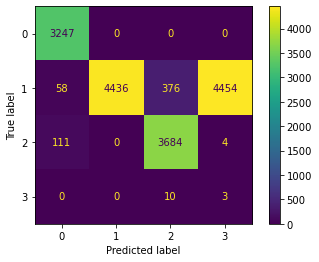

In [17]:
plot_confusion_matrix(gnb, X_test, y_test)